In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [37]:
df = pd.read_excel('/Users/zzzzzz/Crash_Course/Data_Analysis_1_UK(E-Commers 2010-2011)/Online Retail.xlsx')

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
df.columns = df.columns.str.strip()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [41]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [42]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
most_selling_goods = df.groupby('Description')['Quantity'].max()
print(most_selling_goods)

Description
20713                             -400
 4 PURPLE FLOCK DINNER CANDLES      12
 50'S CHRISTMAS GIFT BAG LARGE     400
 DOLLY GIRL BEAKER                 400
 I LOVE LONDON MINI BACKPACK        50
                                  ... 
wrongly marked carton 22804       -256
wrongly marked. 23343 in box     -3100
wrongly sold (22719) barcode       170
wrongly sold as sets              -600
wrongly sold sets                 -975
Name: Quantity, Length: 4223, dtype: int64


In [44]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [45]:
top_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_quantity)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


In [46]:
#top 10 revenuie
top_revenue = df.groupby("Description")['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_revenue)

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: Revenue, dtype: float64


In [47]:
#top 10 clients
top_clients = df.groupby('CustomerID')["Revenue"].sum().sort_values(ascending=False).head(10)
print(top_clients)


CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Revenue, dtype: float64


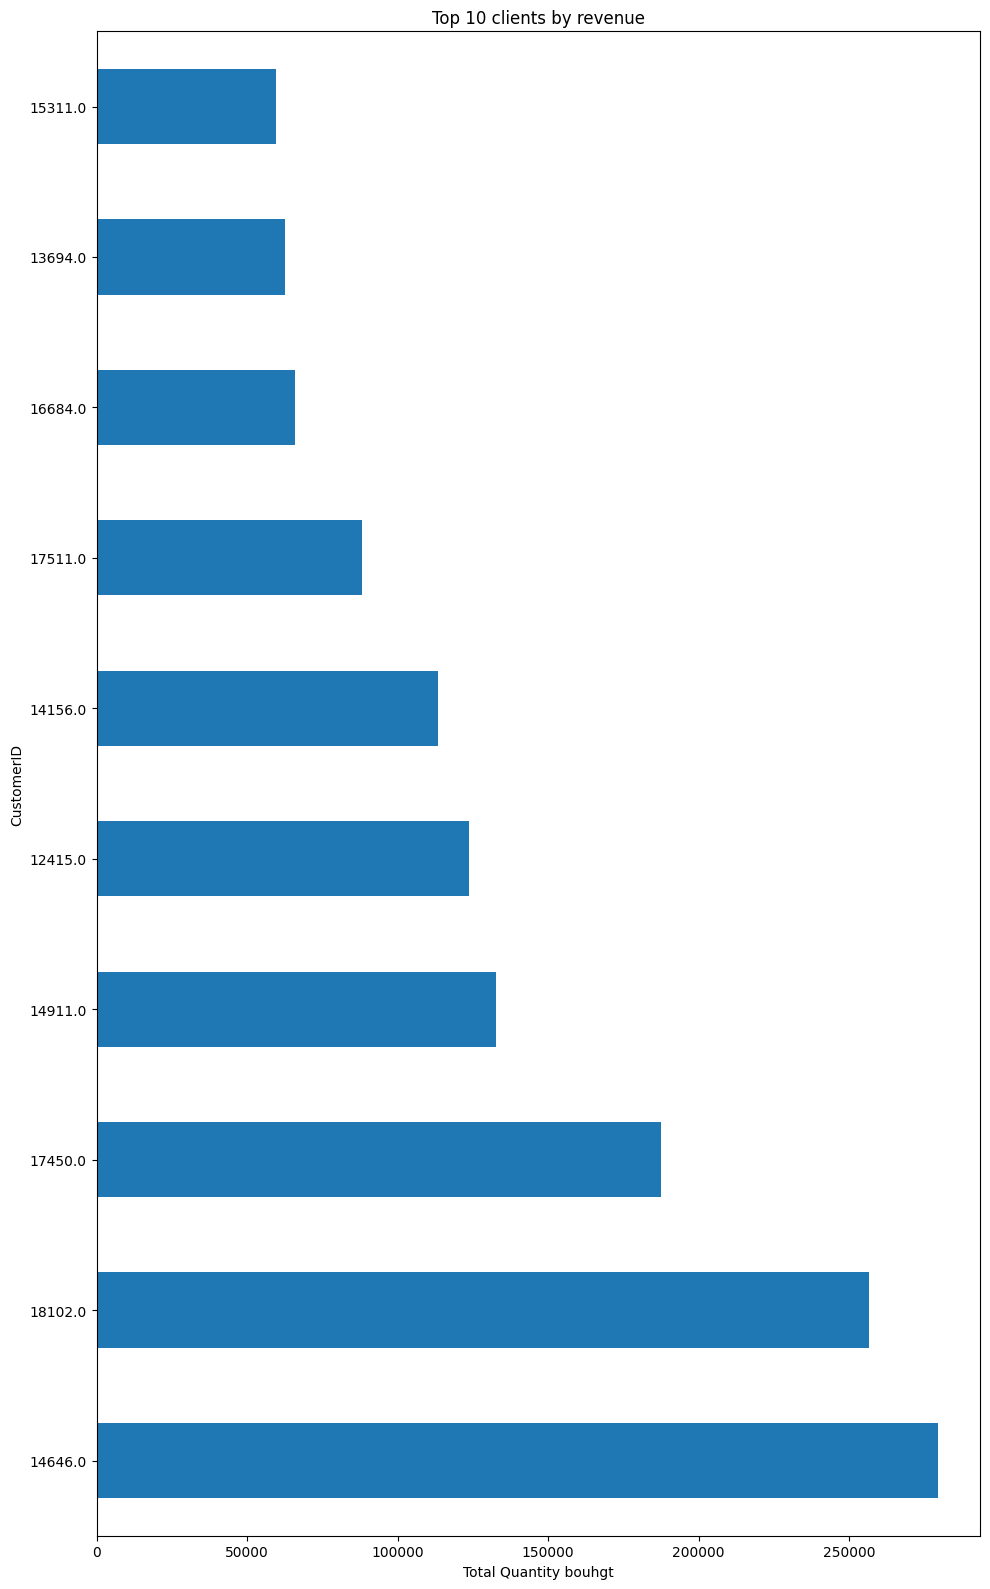

In [48]:
#Vizualizaton
top_clients.plot(kind='barh', title='Top 10 clients by revenue', figsize=(10, 16))
plt.xlabel("Total Quantity bouhgt")
plt.tight_layout()
plt.show()

In [49]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Month"] = df["InvoiceDate"].dt.to_period("M")
df["Weekday"] = df["InvoiceDate"].dt.day_name()
df["Hour"] = df["InvoiceDate"].dt.hour

<Axes: title={'center': 'Revenue by Month'}, xlabel='Month'>

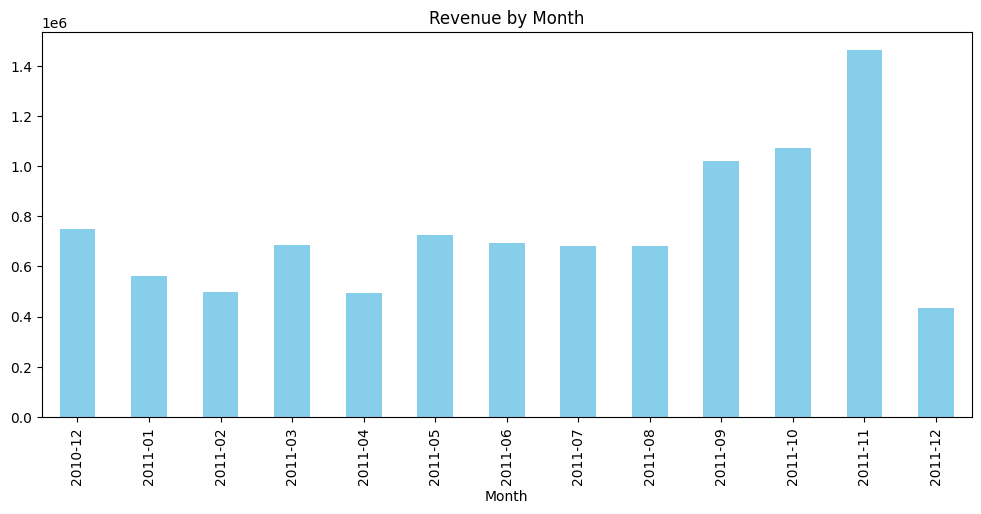

In [50]:
#Monthly Revenue
monthly_revenue = df.groupby("Month")["Revenue"].sum()
monthly_revenue.plot(kind="bar", figsize=(12, 5), title="Revenue by Month", color="skyblue")

<Axes: title={'center': 'Orders by Weekday'}, xlabel='Weekday'>

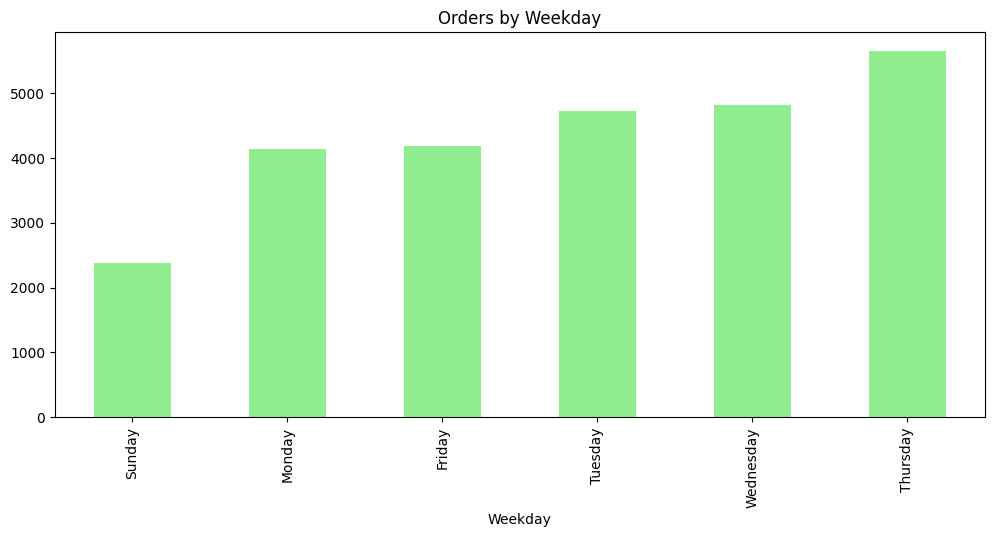

In [51]:
#Sales by Weekday
weekday_orders = df.groupby("Weekday")["InvoiceNo"].nunique().sort_values()
weekday_orders.plot(kind="bar", figsize=(12, 5), title="Orders by Weekday", color="lightgreen")

<Axes: title={'center': 'Order Count by Hour of Day'}, xlabel='Hour'>

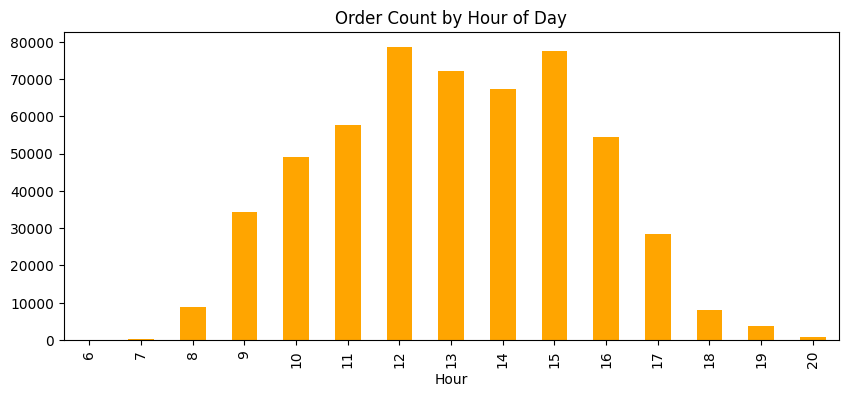

In [52]:
#Activity by Hour
hourly = df.groupby("Hour")["InvoiceNo"].count()
hourly.plot(kind="bar", title="Order Count by Hour of Day", figsize=(10, 4),color="orange")

In [53]:
#Country Revenue
country_revenue = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)


<Axes: title={'center': 'Top 10 Countries by Revenue'}, xlabel='Country'>

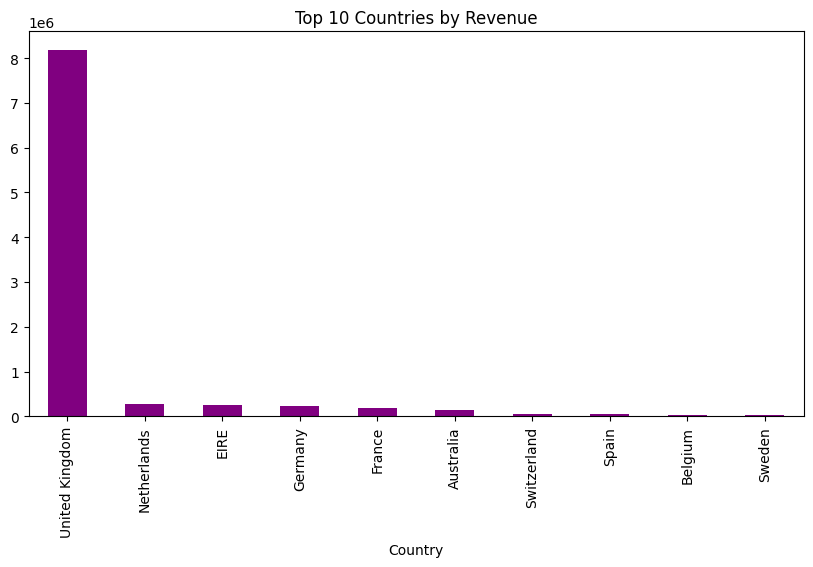

In [54]:
country_revenue.head(10).plot(kind="bar", title="Top 10 Countries by Revenue", figsize=(10, 5), color="purple")


In [56]:
#RFM analysis Recency, Frequency, Monetary
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "Revenue": "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm = rfm.sort_values("Monetary", ascending=False)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
14646.0,2,77,279489.02
18102.0,1,62,256438.49
17450.0,8,55,187482.17
14911.0,1,248,132572.62
12415.0,24,26,123725.45
